In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier  #https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn import preprocessing
import collections 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ParameterGrid

import numpy as np

import warnings
from pandas.core.internals.construction import treat_as_nested
# YOUR CODE HERE
from sklearn.metrics import accuracy_score

from collections import Counter, defaultdict
from itertools import combinations 
import pandas as pd
import numpy as np
import operator
import math
import itertools
from sklearn.feature_extraction import DictVectorizer
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectFromModel

#!wget -nc http://askoski.berkeley.edu/~zp/gender_submission.csv

df = pd.read_csv('gender_submission.csv', delimiter= ',')
df_train = pd.read_csv('train.csv', delimiter= ',')
df_test = pd.read_csv('test.csv', delimiter= ',')
df_train #[["Pclass", "Age", "Fare", "Sex"]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.groupby("Pclass").count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#df_test.isnull().sum()
df_test[df_test["Fare"].isnull() == True]

df_test["Fare"] =  df_test["Fare"].replace(np.nan, df_test["Fare"].median())
df_test["Age"] =  df_test["Age"].replace(np.nan, df_test["Age"].median())
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
def fare_group(x):
  if(x <= 7.5):
    return 0#"less "
  elif(x > 7.5 and x <= 15): # high school
    return 1#"regular" 
  elif(x > 15 and x <= 30): # college
    return 2#"add_ on"
  elif(x > 30 and x <= 45): # young adult
    return 3#"Prenium"
  elif(x > 45):
    #print(x)
    return 4#"expensive"
  else:
    return 5
x = df_train
#x["fare_group"] = x["Fare"].apply(fare_group)
#df_train.corr()

In [ ]:
def name(a):
  x = a.split(' ')[1]
  #print(x)
  
  x = x.strip(' .,!?#/123')
  if(x != "Mr" and x != "Mrs" and x != "Miss" and x != "Master" and x != "Don" 
     and x != "Rev" and x != "Dr" and x != "Capt" and x != "Col" and x != "Ms" 
     and x != "Major"  and x != "Countess" and x != "Lady" and x != "Sir" and 
     x != "Mlle" and x != "Mme"):
    x = a.split(' ')[2]
  #print(x)
  
    x = x.strip(' .,!?#/123')
    
    #x = a.split(' ')[3]
  #print(x)
  
      #x = x.strip(' .,!?#/123') 

  return x
name("Braund, Mr. Owen Harris")
df_train["ID"] = df_train["Name"].apply(name)
df_train["ID"] #.unique()

df_test["ID"] = df_test["Name"].apply(name)
df_train.groupby("ID").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
ID,,,,,,,,,,,,
Capt,1,1,1,1,1,1,1,1,1,1,1,1
Castellana,2,2,2,2,2,2,2,2,2,2,2,2
Col,2,2,2,2,2,2,2,2,2,2,1,2
Countess,1,1,1,1,1,1,1,1,1,1,1,1
Don,1,1,1,1,1,1,1,1,1,1,0,1
Dr,7,7,7,7,7,6,7,7,7,7,3,7
John,1,1,1,1,1,1,1,1,1,1,0,1
Lady,1,1,1,1,1,1,1,1,1,1,1,1
Major,2,2,2,2,2,2,2,2,2,2,2,2


In [ ]:
def SR(x):
  if(x == "Mr"):
    return "Mr"
  if(x == "Mrs" or x == "Mme" ):
    return "Mrs"
  if(x == "Miss" or x == "ms" or x == "Lady" or x == "Mlle"):
    return "Miss"
  if(x == "Master"):
    return "Master"
  #if(x == "Rev" or x == "Dr" or x == "Col" or x == "Capt" or x == "Castellana" or x == "Major" or x == "Countess"):
    #return 4
  else:
    return "other"
df_train["ID"] = df_train["ID"].apply(SR)
df_test["ID"] = df_test["ID"].apply(SR)
df_test.groupby("ID").count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
ID,,,,,,,,,,,
Master,21,21,21,21,21,21,21,21,21,2,21
Miss,77,77,77,77,77,77,77,77,77,11,77
Mr,238,238,238,238,238,238,238,238,238,41,238
Mrs,72,72,72,72,72,72,72,72,72,32,72
other,10,10,10,10,10,10,10,10,10,5,10


## Boy and Girl Feature

In [ ]:
master = df_train["Name"].str.contains('Master') # found that master are boys
capt = df_train["Name"].str.contains('Capt')
mr = df_train["Name"].str.contains('Mr') # adults
male = df_train["Sex"] == 'male'
thir = 13
s13 = df_train["Age"] < thir
girls = ((df_train["Sex"] == 'female') & (s13))
boys = ((male) & (s13)) | (master) # find only the boys or male and 13 
females = (df_train["Sex"] == "female")
df_train["Girl"] = girls # no girls
df_train['Boy'] = boys 

df_train['Female'] = females.astype(int)

b_a_f = boys | females # takes both females or boys based on plot above
# | = or

#df_train["People_s"] = boys | females

baf = df_train[b_a_f]

#median

# Girl not correlated

#----------------------------------
#df_train[b_a_f].groupby('Ticket')["Age"].count() #.mean()
x = df_train
x = x[["Survived", "Boy", "Female", "Girl"]].replace({False: 0, True: 1})
#x
#baf
x["Girl"].sum() #no girls

32

In [ ]:
x["Boy"].sum()

41

In [ ]:
df_train.groupby("Boy")["Survived"].sum() # percentage
# shows boys surived more 0.5609756097560976%
#41 total boys, 23 boys surived, already know females surived
23/ 41

0.5609756097560976

In [ ]:
df_train.groupby("Boy").mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Female
Boy,,,,,,,,,
False,447.123529,0.375294,2.292941,31.062777,0.440000,0.335294,32.102396,0.037647,0.369412
True,422.707317,0.560976,2.634146,4.747838,2.243902,1.341463,34.314939,0.000000,0.000000


In [ ]:
df_train.groupby("Boy")["Survived"].count()

Boy
False    850
True      41
Name: Survived, dtype: int64

In [ ]:
df_train.groupby("Survived")["PassengerId"].count()

Survived
0    549
1    342
Name: PassengerId, dtype: int64

In [ ]:
df_train.groupby("Female")["Survived"]


In [ ]:
baf.groupby("Survived")["PassengerId"].count()

Survived
0     99
1    256
Name: PassengerId, dtype: int64

In [ ]:
df_train["Girl"]

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Girl, Length: 891, dtype: bool

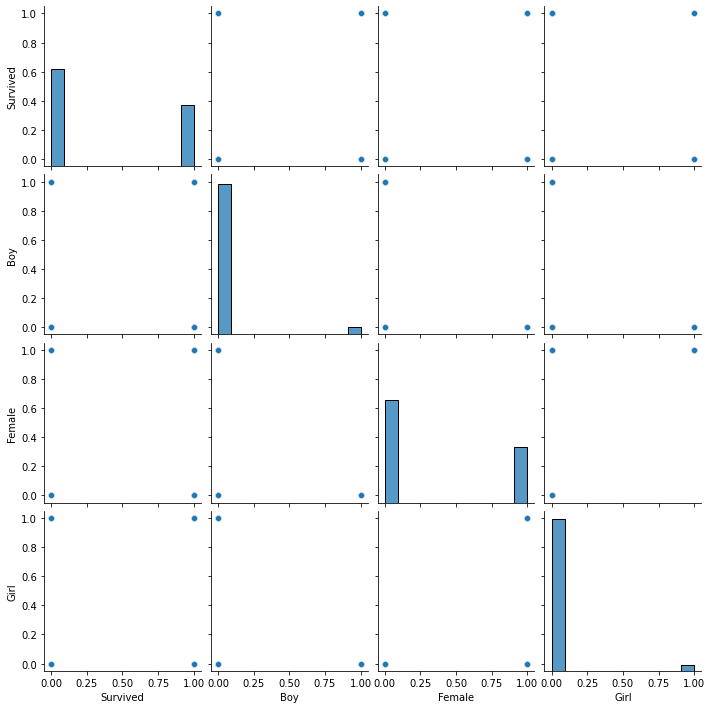

In [ ]:
import seaborn as sns

sns.pairplot(x)

In [ ]:
#

In [ ]:
tic_sur = baf.groupby('Cabin')["Survived"].count()
et = tic_sur.index
df_train['Num_of_Cabin'] = df_train["Cabin"].replace(tic_sur)

a = df_train["Cabin"].isin(et)
df_train.loc[~a,'Num_of_Cabin'] = 0
df_train["Num_of_Cabin"] = df_train["Num_of_Cabin"] #.dtype(str)
df_train.groupby("Num_of_Cabin").count() #.corr()
df_train = df_train.drop("Num_of_Cabin", axis = 1)

In [ ]:
#Here I look at number of tickets by females and boys

In [ ]:

n_tic = baf.groupby('Ticket')["Survived"].count() # number of tickets
tic_sur2 = baf.groupby('Ticket')["Survived"].median() # taking surived median based on ticket
tic_sur
baf.groupby('Ticket')["Survived"].mean().sum() #195.25
#baf.groupby('Ticket')["Survived"].mean().count() #256
#195.25 / 256
#76% 
baf["Survived"].sum()

256

In [ ]:
et2 = n_tic.index
a = df_train["Ticket"].isin(et2)
ca = df_test["Ticket"].str.contains('C.A')
pc = df_test["Ticket"].str.contains('PC')
ca = df_test["Ticket"].str.contains('SC/AH')
print(et)

Index(['A16', 'A34', 'B18', 'B20', 'B22', 'B28', 'B3', 'B35', 'B39', 'B4',
       'B42', 'B49', 'B5', 'B57 B59 B63 B66', 'B58 B60', 'B69', 'B73', 'B77',
       'B78', 'B79', 'B80', 'B96 B98', 'C101', 'C103', 'C123', 'C125', 'C126',
       'C2', 'C22 C26', 'C23 C25 C27', 'C32', 'C45', 'C49', 'C50', 'C54',
       'C62 C64', 'C65', 'C68', 'C7', 'C78', 'C83', 'C85', 'C90', 'C92', 'C93',
       'C99', 'D', 'D11', 'D15', 'D17', 'D20', 'D21', 'D28', 'D33', 'D35',
       'D36', 'D37', 'D47', 'D7', 'D9', 'E101', 'E121', 'E33', 'E34', 'E36',
       'E40', 'E44', 'E49', 'E67', 'E68', 'E77', 'E8', 'F E69', 'F2', 'F33',
       'F4', 'G6'],
      dtype='object', name='Cabin')


In [ ]:
df_train['Num_of_Ticket'] = df_train["Ticket"].replace(n_tic)

 #,'Num_of_Ticket'
# if ticket in females and boys, show num, otherwise 0
#df_train.groupby('Ticket')["Survived"].count()
df_train.loc[~a, "Num_of_Ticket"] = 0 # change to zero if  not female  ticket
tic_surs = baf.groupby('Ticket')["Survived"].median()
#----
def tickets(x, y):
  if(y ==  et2):
    x[~(y == n_tic.index), "Num_of_Ticket" ] = 0
  return  x
#-----------
# if ticket is females and boys, show num, otherwise 0 
#

#df_train["Ticket_mean"].isnull().sum()
#df_test["Ticket"].unique()
#ca.sum()
#tickets(df_train["Ticket"], et)
df_train['Num_of_Ticket'] = df_train['Num_of_Ticket'].astype(int)
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.015289,-0.019889,-0.042939,-0.026957
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.083309,0.079996,0.543351,0.218735
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.087510,0.085554,-0.131900,-0.033053
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.371591,-0.401830,-0.093254,-0.314098
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.182041,0.342930,0.114631,0.641970
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.260464,0.261681,0.245489,0.692114
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.016508,0.009334,0.182333,0.296949
Girl,-0.015289,0.083309,0.087510,-0.371591,0.182041,0.260464,-0.016508,1.000000,-0.042390,0.261638,0.328052
Boy,-0.019889,0.079996,0.085554,-0.401830,0.342930,0.261681,0.009334,-0.042390,1.000000,-0.162017,0.393461
Female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.261638,-0.162017,1.000000,0.478069


In [ ]:
baf.groupby('Ticket').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,ID,Girl,Boy,Female
Ticket,,,,,,,,,,,,,,,
110152,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
110413,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
110813,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
111361,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
112053,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W./C. 14258,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1
W./C. 6607,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1
W./C. 6608,3,3,3,3,3,3,3,3,3,0,3,3,3,3,3


In [ ]:
def check(x):
  a = df_train["Ticket"].isin(et2) # for non-integer values convert to 0
  #print(a)
  if(~a):
    return 0

In [ ]:
baf.groupby('Ticket').mean() #majority of females surived and are rich

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Boy,Female
Ticket,,,,,,,,,,
110152,507.666667,1.0,1.0,26.333333,0.000000,0.000000,86.5000,0.000000,0.0,1.0
110413,572.500000,1.0,1.0,28.500000,0.500000,1.500000,79.6500,0.000000,0.0,1.0
110813,367.000000,1.0,1.0,60.000000,1.000000,0.000000,75.2500,0.000000,0.0,1.0
111361,427.000000,1.0,1.0,30.000000,0.000000,1.000000,57.9792,0.000000,0.0,1.0
112053,888.000000,1.0,1.0,19.000000,0.000000,0.000000,30.0000,0.000000,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
W./C. 14258,527.000000,1.0,2.0,50.000000,0.000000,0.000000,10.5000,0.000000,0.0,1.0
W./C. 6607,889.000000,0.0,3.0,NaN,1.000000,2.000000,23.4500,0.000000,0.0,1.0
W./C. 6608,440.666667,0.0,3.0,26.000000,1.666667,2.333333,34.3750,0.333333,0.0,1.0


In [ ]:
x = baf.groupby('Fare')["Survived"].mean() #surival rate
x2 = x.index

df_train['Fare_mean'] = df_train["Fare"].replace(x)
a = df_train["Fare"].isin(x2)
df_train.loc[~a,'Fare_mean'] = 0 # change males to 0
df_train['Fare_mean'] = df_train['Fare_mean'].astype(int)
df_train.corr()
#x
x = baf.groupby('Fare')["Survived"].mean() #surival rate
x2 = x.index

df_test['Fare_mean'] = df_test["Fare"].replace(x)
a = df_test["Fare"].isin(x2)
df_test.loc[~a,'Fare_mean'] = 0 
df_test['Fare_mean'] = df_test['Fare_mean'].astype(int)
df_test.corr()
df_train = df_train.drop(columns = ["Fare_mean"], axis = 1)

In [ ]:
tic_sur = baf.groupby('Ticket')["Survived"].mean()
et = tic_sur.index
a = df_train["Ticket"].isin(et)
tic_sur = baf.groupby('Ticket')["Survived"].mean() # taking surived mean based on ticket
# the ticket passenger who surived based on surival rate
df_train['Ticket_mean'] = df_train["Ticket"].replace(tic_sur) #.apply(check)
df_train.loc[~a,'Ticket_mean'] = 0 # show boys
df_train['Ticket_mean'] = df_train['Ticket_mean'].astype(int)
df_train.corr()

#df_train['Ticket_mean'].unique()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,Ticket_mean
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.015289,-0.019889,-0.042939,-0.026957,-0.015325
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.083309,0.079996,0.543351,0.218735,0.714892
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.087510,0.085554,-0.131900,-0.033053,-0.374292
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.371591,-0.401830,-0.093254,-0.314098,-0.051335
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.182041,0.342930,0.114631,0.641970,0.045270
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.260464,0.261681,0.245489,0.692114,0.159689
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.016508,0.009334,0.182333,0.296949,0.359021
Girl,-0.015289,0.083309,0.087510,-0.371591,0.182041,0.260464,-0.016508,1.000000,-0.042390,0.261638,0.328052,0.084365
Boy,-0.019889,0.079996,0.085554,-0.401830,0.342930,0.261681,0.009334,-0.042390,1.000000,-0.162017,0.393461,0.072889
Female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.261638,-0.162017,1.000000,0.478069,0.584748


In [ ]:
x = baf.groupby('Pclass')["Survived"].mean() #surival rate
x2 = x.index

df_train['Pclass_mean'] = df_train["Pclass"].replace(x)
df_train['Pclass_mean']

def tests(x):
  if(x > .5):
    return 1
  else:
    return 0
df_train['Pclass_mean'] = df_train["Pclass_mean"].apply(tests)
df_train['Pclass_mean'].unique()


array([0, 1])

In [ ]:
a = df_train["Pclass"].isin(x2)
df_train.loc[~a,'Pclass_mean'] = 0 # 
df_train['Pclass_mean'] = df_train['Pclass_mean'].astype(int)
df_train.corr()
#df_train['Pclass_mean'].unique()
df_train = df_train.drop(columns = ["Pclass_mean"], axis = 1)

In [ ]:
x = baf.groupby('Age')["Survived"].mean() #surival rate
x2 = x.index

df_train['Age_mean'] = df_train["Age"].replace(x)
a = df_train["Age"].isin(x2)
df_train.loc[~a,'Age_mean'] = 0 
df_train['Age_mean'] = df_train['Age_mean'].astype(int)
df_train.corr()
#x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.015289,-0.019889,-0.042939,-0.026957,-0.015325,0.013707
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.083309,0.079996,0.543351,0.218735,0.714892,0.142433
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.087510,0.085554,-0.131900,-0.033053,-0.374292,-0.214786
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.371591,-0.401830,-0.093254,-0.314098,-0.051335,0.234337
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.182041,0.342930,0.114631,0.641970,0.045270,-0.051181
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.260464,0.261681,0.245489,0.692114,0.159689,-0.041546
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.016508,0.009334,0.182333,0.296949,0.359021,0.119335
Girl,-0.015289,0.083309,0.087510,-0.371591,0.182041,0.260464,-0.016508,1.000000,-0.042390,0.261638,0.328052,0.084365,-0.005926
Boy,-0.019889,0.079996,0.085554,-0.401830,0.342930,0.261681,0.009334,-0.042390,1.000000,-0.162017,0.393461,0.072889,-0.029351
Female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.261638,-0.162017,1.000000,0.478069,0.584748,0.019217


In [ ]:
x = baf.groupby('Age')["Survived"].mean() #surival rate
x2 = x.index

df_test['Age_mean'] = df_test["Age"].replace(x)
a = df_test["Age"].isin(x2)
df_test.loc[~a,'Age_mean'] = 0 
df_test['Age_mean'] = df_test['Age_mean'].astype(int)
df_train.corr()
#x

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.015289,-0.019889,-0.042939,-0.026957,-0.015325,0.013707
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.083309,0.079996,0.543351,0.218735,0.714892,0.142433
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.087510,0.085554,-0.131900,-0.033053,-0.374292,-0.214786
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.371591,-0.401830,-0.093254,-0.314098,-0.051335,0.234337
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.182041,0.342930,0.114631,0.641970,0.045270,-0.051181
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.260464,0.261681,0.245489,0.692114,0.159689,-0.041546
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.016508,0.009334,0.182333,0.296949,0.359021,0.119335
Girl,-0.015289,0.083309,0.087510,-0.371591,0.182041,0.260464,-0.016508,1.000000,-0.042390,0.261638,0.328052,0.084365,-0.005926
Boy,-0.019889,0.079996,0.085554,-0.401830,0.342930,0.261681,0.009334,-0.042390,1.000000,-0.162017,0.393461,0.072889,-0.029351
Female,-0.042939,0.543351,-0.131900,-0.093254,0.114631,0.245489,0.182333,0.261638,-0.162017,1.000000,0.478069,0.584748,0.019217


In [ ]:
# now focus on test data
master = df_test["Name"].str.contains('Master')
girls = (master) | ((df_test["Sex"] =='female') & (s13))
male = df_test["Sex"] =='male'
s13 = df_test["Age"] < 13
boys = (master) | ((male) & (s13))
df_test["Girl"] = girls
females = df_test["Sex"] == 'female'
df_test['Boy'] = boys 
df_test['Female'] = females.astype(int)

# girls and men do not surive dont matter, so we take the number of tickets for females and boys

df_test['Num_of_Ticket'] = df_test["Ticket"].replace(n_tic)  
a = df_test["Ticket"].isin(n_tic.index) 


#df_test[a]
df_test.loc[~a,"Num_of_Ticket"] = 0 # ticket 0 # produces error

y = 1 - df_train["Survived"]

x = 1 - df_train["Survived"]

df_test['Ticket_mean'] = df_test["Ticket"].replace(tic_sur)
a = df_test["Ticket"].isin(tic_sur.index)
df_test.loc[~a,'Ticket_mean']= 0


In [1]:
def fin(x):
  #x = str(x)
  #print(x)
  y = df_train["Ticket"]
  if(isinstance(x, str) == True):
    return 0
  else:
    #print(x)
    return x

In [ ]:
# feature engineering title from name
#data['title'] = data['Name'].str.extract(', (\w*).')
#data['Mr'] = (data['title'] == 'Mr').astype(int)
#data['Mrs'] = (data['title'] == 'Mrs').astype(int)
#data['Master'] = (data['title'] == 'Master').astype(int)
#data['Miss'] = (data['title'] == 'Miss').astype(int)
#data['Other'] = (data['title'].isin(['Mr', 'Mrs', 'Miss', 'Master'])).astype(int)

In [ ]:
import random
u = df_train.mean()
std = df_train.std()
val = random.choice([df_train["Age"].min(), df_train["Age"].max()])
#print(val)
df_train["Age"] = df_train["Age"].replace(np.nan, random.choice([df_train["Age"].min(), df_train["Age"].max()]))
df_test["Age"] = df_test["Age"].replace(np.nan, random.choice([df_test["Age"].min(), df_test["Age"].max()]))
print(df_train["Age"].isnull().sum())
#age_train = df_train.fillna({"Age": df_train["Age"].mean()})["Age"]
#df_train["Age"] = (age_train - age_train.mean()) / age_train.std()
#df_train["Fare"] = (df_train["Fare"] - df_train["Fare"].mean()) / df_train["Fare"].std()
def ages(x):
  if(x <= 11):
    return "Young age" # Young Age
  elif(x > 11 and x <= 18): # high school
    return "high school" 
  elif(x > 18 and x <= 22): # college
    return "college"
  elif(x > 22 and x <= 27): # young adult
    return "young adults"
  elif(x > 27 and x <= 33): # middle age
    return "transit age"
  elif(x > 33 and x <= 40): #
    return "middle age"
  elif(x > 40 and x <= 66): #near old
    return "old adults"
  elif(x > 66):
    #print(x)
    return "old old"
  
#ages(0)
df_train["Age_a"] = df_train["Age"].apply(ages)
df_test["Age_a"] = df_test["Age"].apply(ages)
df_train.groupby("Age_a").count()

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ID,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean
Age_a,,,,,,,,,,,,,,,,,,,
Young age,245,245,245,245,245,245,245,245,245,245,30,245,245,245,245,245,245,245,245
college,92,92,92,92,92,92,92,92,92,92,12,92,92,92,92,92,92,92,92
high school,71,71,71,71,71,71,71,71,71,71,12,71,71,71,71,71,71,71,71
middle age,101,101,101,101,101,101,101,101,101,101,37,100,101,101,101,101,101,101,101
old adults,143,143,143,143,143,143,143,143,143,143,63,142,143,143,143,143,143,143,143
old old,7,7,7,7,7,7,7,7,7,7,3,7,7,7,7,7,7,7,7
transit age,126,126,126,126,126,126,126,126,126,126,24,126,126,126,126,126,126,126,126
young adults,106,106,106,106,106,106,106,106,106,106,23,106,106,106,106,106,106,106,106


In [ ]:
df_train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
def cabins(x):
  x = str(x)[0]
  #print(i)
  #print(x)
  if(x == "A"):
    return "A"
  if(x == "B"):
    return "B"
  if(x == "C"):
    return "C"
  if(x == "D"):
    return "D"
  if(x == "E"):
    return "E"
  if(x == "F"):
    return "F"
  if(x == "G"):
    return "G"
  if(x == "T"):
    return "T"
  if(x == "n"):
    return np.nan
  else:
    print(x)
    return 9
def cabins2(x):
  x = str(x)[0]
  #print(i)
  #print(x)
  if(x == "n"):
    return "No cabin"
  elif(x == "A" or x == "B" or x == "C"):
    return " Highest Cabin"
  elif(x == "D" or x == "E" or x == "F"):
    return "Middle Cabin"
  else:
    return "Lowest Cabin"
df_train["Compartment"] = df_train["Cabin"].apply(cabins)
df_test["Compartment"] = df_test["Cabin"].apply(cabins)
df_train.groupby("Compartment").count()
#df_train["Compartment"].isnull().sum()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ID,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean,Age_a
Compartment,,,,,,,,,,,,,,,,,,,,
A,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
B,47,47,47,47,47,47,47,47,47,47,47,45,47,47,47,47,47,47,47,47
C,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
D,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33,33
E,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
F,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
T,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
x = df_train["Compartment"].isna()
cnan = df_train[x == True]
cnnan = df_train[x == False]
print(cnan)
print(cnnan)
sam = {}
x = cnan["Ticket"].unique()

for i in (x):
  y = cnnan["Ticket"].unique()
  if (i in y):
    
    sam[i] = cnnan[cnnan["Ticket"] == i]['Cabin']
for i in sam:
  valu = sam[i]    
  indexs = cnan[cnan["Ticket"] == i]
  indexs = indexs.index
  cnan.loc[indexs, 'Compartment'] = valu

  tw = 20
  hun = 100
  fif = 50
  fs = cnan[cnan["Fare"] < tw]
  fs = fs.index
  df_train.loc[fs, 'Compartment'] = 'F' 

  bs = cnan[cnan["Fare"] > hun]
  bs = bs.index
  df_train.loc[bs, 'Compartment'] = 'B' 
    
  es = cnan[(cnan["Fare"] > tw) & (cnan["Fare"] < fif)]
  es = es.index
  df_train.loc[es, 'Compartment'] = 'E' 
    
  ds = cnan[(cnan["Fare"] > fif) & (cnan["Fare"] < hun)]
  ds = ds.index
  df_train.loc[ds, 'Compartment'] = 'D'

  
df_train["Compartment"].isnull().sum()
df_train.groupby("Compartment").count()
# G and T not important

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ID,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean,Age_a
Compartment,,,,,,,,,,,,,,,,,,,,
A,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
B,57,57,57,57,57,57,57,57,57,57,47,55,57,57,57,57,57,57,57,57
C,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59,59
D,62,62,62,62,62,62,62,62,62,62,33,62,62,62,62,62,62,62,62,62
E,191,191,191,191,191,191,191,191,191,191,32,191,191,191,191,191,191,191,191,191
F,502,502,502,502,502,502,502,502,502,502,13,502,502,502,502,502,502,502,502,502
G,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
T,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
# the goal is the change na based on other columns such as fare
x = df_test["Compartment"].isna()
# take the Na out
cnan = df_test[x == True]
cnnan = df_test[x == False]
print(cnan)
print(cnnan)
sam = {} # dict
y = cnan["Ticket"].unique()
for i in y:
  x = cnnan["Ticket"].unique()
  if (i in x):
    sam[i] = cnnan[cnnan["Ticket"] == i]['Cabin']

#Did not use A, since numbers are less
for i in sam:
  valu = sam[i]    
  indexs = cnan[cnan["Ticket"] == i]
  indexs = indexs.index
  cnan.loc[indexs, 'Compartment'] = valu
  tw = 20
  hun = 100
  fif = 50
# low class
  fs = cnan[cnan["Fare"] < tw]
  fs = fs.index
  df_test.loc[fs, 'Compartment'] = 'F' 
# high class
  bs = cnan[cnan["Fare"] > hun]
  bs = bs.index
  df_test.loc[bs, 'Compartment'] = 'B' 
# midle class  1
  es = cnan[(cnan["Fare"] > tw) & (cnan["Fare"] < fif)]
  es = es.index
  df_test.loc[es, "Compartment"] = 'E' 
# middle class 2 
  ds = cnan[(cnan["Fare"] > fif) & (cnan["Fare"] < hun)]
  ds = ds.index
  df_test.loc[ds, "Compartment"] = 'D'

  
df_test["Compartment"].isnull().sum()
df_test.groupby("Compartment").count()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ID,Fare_mean,Age_mean,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_a
Compartment,,,,,,,,,,,,,,,,,,,,
A,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7
B,22,22,22,22,22,22,22,22,22,18,22,22,22,22,22,22,22,22,22,22
C,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
D,28,28,28,28,28,28,28,28,28,13,28,28,28,28,28,28,28,28,28,28
E,89,89,89,89,89,89,89,89,89,9,89,89,89,89,89,89,89,89,89,89
F,236,236,236,236,236,236,236,236,236,8,236,236,236,236,236,236,236,236,236,236
G,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:

#df_train["Embarked"] = df_train["Embarked"].replace({"S" : 0, "C": 1, "Q": 2, np.nan : 0})

#df_test["Embarked"] = df_test["Embarked"].replace({"S" : 0, "C": 1, "Q": 2, np.nan : 0})
df_train.groupby("Embarked").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,ID,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean,Age_a,Compartment
Embarked,,,,,,,,,,,,,,,,,,,,
C,168,168,168,168,168,168,168,168,168,168,69,168,168,168,168,168,168,168,168,168
Q,77,77,77,77,77,77,77,77,77,77,4,77,77,77,77,77,77,77,77,77
S,644,644,644,644,644,644,644,644,644,644,129,644,644,644,644,644,644,644,644,644


In [ ]:
df_train["fam"] = df_train["SibSp"] + df_train["Parch"] + 1 
df_test["fam"] = df_test["SibSp"] + df_test["Parch"] + 1
def fam(x):
    
    if (x == 2):
        return 'Lit'
    elif (x == 3):
        return 'Med'
    elif (x >= 5):
        return 'Large'
    else:
        return 'UNO'
df_train["fami"] =  df_train["fam"].apply(fam)
df_test["fami"] =  df_test["fam"].apply(fam)

In [ ]:
def Mr(x):
  return 0

## Combining variables:*italicized text*

In [ ]:
# the goal is to predict the surivors based on tickets and females and boys
def ticks(x):
  fs = x["Num_of_Ticket"] > 0
  fs2 = x["Ticket_mean"]  == 0 # dead
  if ((fs2) and (fs)): # seeing if surived or not 1 if survived 0 otherwise
      return 0    # died
  else:
      return 1 # surived
def ticks2(x):
  fs = x["Num_of_Ticket"] > 0
  fs2 = x["Ticket_mean"]  == 1 # it surived, based on surival rate
  if (fs2) and (fs): # seeing if surived or not 1 if survived 0 otherwise
      return 1  # surived 
  else:
      return 0 # died


def survival(x): # now check surival based on ticket mean()
 
  if (x["fam"] == 1):
    return ticks(x)
  elif (x["fam"] == 2 or x["fam"] == 3): #x["Female"] == 0 # seeing if surived or not 1 if survived 0 otherwise
    return ticks2(x)     
  else:
    return 0
# now check surival based on ticket mean()
def survival2(x): 
  #print(x["Boy"]
  if (x["Boy"] == True): # for all boys
    return ticks2(x)
  elif (x["Female"] == 1): #x["Female"] == 0 # seeing if surived or not 1 if survived 0 otherwise
    return ticks(x)  # check females   
  else:
    return 0  # males who died
x = df_train[["Female","Boy","Num_of_Ticket","Ticket_mean"]]
#print(x)
df_train["pred"] = x.apply(survival2, axis = 1)
df_test["pred"] = df_test[["Female","Boy","Num_of_Ticket","Ticket_mean"]].apply(survival2, axis = 1)
#survival(df_test)#df_test.apply(survival)
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean,fam,pred
PassengerId,1.000000,-0.005007,-0.035144,0.038177,-0.057527,-0.001652,0.012658,-0.015289,-0.019889,-0.042939,-0.026957,-0.015325,0.013707,-0.040143,-0.021845
Survived,-0.005007,1.000000,-0.338481,0.009723,-0.035322,0.081629,0.257307,0.083309,0.079996,0.543351,0.218735,0.714892,0.142433,0.016639,0.793451
Pclass,-0.035144,-0.338481,1.000000,-0.362021,0.083081,0.018443,-0.549500,0.087510,0.085554,-0.131900,-0.033053,-0.374292,-0.214786,0.065997,-0.267145
Age,0.038177,0.009723,-0.362021,1.000000,-0.185670,-0.050290,0.135422,-0.210816,-0.245811,-0.025669,-0.149557,0.034474,0.335107,-0.152023,-0.040102
SibSp,-0.057527,-0.035322,0.083081,-0.185670,1.000000,0.414838,0.159651,0.182041,0.342930,0.114631,0.641970,0.045270,-0.051181,0.890712,-0.000622
Parch,-0.001652,0.081629,0.018443,-0.050290,0.414838,1.000000,0.216225,0.260464,0.261681,0.245489,0.692114,0.159689,-0.041546,0.783111,0.133855
Fare,0.012658,0.257307,-0.549500,0.135422,0.159651,0.216225,1.000000,-0.016508,0.009334,0.182333,0.296949,0.359021,0.119335,0.217138,0.220963
Girl,-0.015289,0.083309,0.087510,-0.210816,0.182041,0.260464,-0.016508,1.000000,-0.042390,0.261638,0.328052,0.084365,-0.005926,0.254542,0.120481
Boy,-0.019889,0.079996,0.085554,-0.245811,0.342930,0.261681,0.009334,-0.042390,1.000000,-0.162017,0.393461,0.072889,-0.029351,0.365113,0.112534
Female,-0.042939,0.543351,-0.131900,-0.025669,0.114631,0.245489,0.182333,0.261638,-0.162017,1.000000,0.478069,0.584748,0.019217,0.200988,0.739249


In [ ]:
df_train[["Survived", "Embarked", "Compartment", "Age_a", "ID"]].corr()

,Survived
Survived,1.0


In [ ]:
df_train = df_train.replace({"male": 0, "female": 1})
df_test = df_test.replace({"male": 0, "female": 1})

In [ ]:
#df_train["fam"] = (df_train["SibSp"] + df_train["Parch"]) /  df_train["Fare"]

In [ ]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,Ticket_mean,Age_mean,fam,pred
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.038177,-0.057527,-0.001652,0.012658,-0.015289,-0.019889,-0.042939,-0.026957,-0.015325,0.013707,-0.040143,-0.021845
Survived,-0.005007,1.000000,-0.338481,0.543351,0.009723,-0.035322,0.081629,0.257307,0.083309,0.079996,0.543351,0.218735,0.714892,0.142433,0.016639,0.793451
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.362021,0.083081,0.018443,-0.549500,0.087510,0.085554,-0.131900,-0.033053,-0.374292,-0.214786,0.065997,-0.267145
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.025669,0.114631,0.245489,0.182333,0.261638,-0.162017,1.000000,0.478069,0.584748,0.019217,0.200988,0.739249
Age,0.038177,0.009723,-0.362021,-0.025669,1.000000,-0.185670,-0.050290,0.135422,-0.210816,-0.245811,-0.025669,-0.149557,0.034474,0.335107,-0.152023,-0.040102
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.185670,1.000000,0.414838,0.159651,0.182041,0.342930,0.114631,0.641970,0.045270,-0.051181,0.890712,-0.000622
Parch,-0.001652,0.081629,0.018443,0.245489,-0.050290,0.414838,1.000000,0.216225,0.260464,0.261681,0.245489,0.692114,0.159689,-0.041546,0.783111,0.133855
Fare,0.012658,0.257307,-0.549500,0.182333,0.135422,0.159651,0.216225,1.000000,-0.016508,0.009334,0.182333,0.296949,0.359021,0.119335,0.217138,0.220963
Girl,-0.015289,0.083309,0.087510,0.261638,-0.210816,0.182041,0.260464,-0.016508,1.000000,-0.042390,0.261638,0.328052,0.084365,-0.005926,0.254542,0.120481
Boy,-0.019889,0.079996,0.085554,-0.162017,-0.245811,0.342930,0.261681,0.009334,-0.042390,1.000000,-0.162017,0.393461,0.072889,-0.029351,0.365113,0.112534


In [ ]:
df_train["Age"] = df_train["Age"].fillna({"Age": df_train["Age"].median()})
df_test["Age"] = df_test["Age"].fillna({"Age": df_test["Age"].median()})
age_train = df_train.fillna({"Age": df_train["Age"].mean()})["Age"]
df_train["Ages"] = (age_train - age_train.mean()) / age_train.std()
df_train["Fares"] = (df_train["Fare"] - df_train["Fare"].mean()) / df_train["Fare"].std()
df_train
age_test = df_test.fillna({"Age": df_test["Age"].mean()})["Age"]
df_test["Ages"] = (age_test - age_test.mean()) / age_test.std()
df_test["Fares"] = (df_test["Fare"] - df_test["Fare"].mean()) / df_test["Fare"].std()
df_test["Fares"] = df_test["Fares"].fillna({"Fares": df_test["Fares"].median()})
df_train["Fares"] = df_train["Fares"].fillna({"Fares": df_train["Fares"].median()})
df_train.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
ID                 0
Girl               0
Boy                0
Female             0
Num_of_Ticket      0
Ticket_mean        0
Age_mean           0
Age_a              0
Compartment        0
fam                0
fami               0
pred               0
Ages               0
Fares              0
dtype: int64

In [ ]:
df_train["p*fare"] = df_train["Fare"]*df_train["Pclass"]
df_test["p*fare"] = df_test["Fare"]*df_test["Pclass"]
df_train.corr()
df_test["p*fare"] = df_test["p*fare"].replace(np.nan, df_test["p*fare"].mean()) #.isnull().sum()
#X_train["p*fare"].replace(np.nan, X_train["p*fare"].mean()).unique()
df_test["Age_a"].isnull().sum()

0

In [ ]:
df_train["Fare"] = df_train["Fare"].replace(np.NaN, df_train["Fare"].median())
df_test["Fare"] = df_test["Fare"].replace(np.NaN, df_test["Fare"].median())

#df_trains["Fare"] = df_trains["Fare"].replace(np.NaN, df_trains["Fare"].mean())
#df_tests["Fare"] = df_tests["Fare"].replace(np.NaN, df_tests["Fare"].mean())

In [ ]:
df_train["Pclass"] = (df_train["Pclass"]).astype(str)
df_test["Pclass"] = (df_test["Pclass"]).astype(str)

In [ ]:
df_tests = pd.get_dummies(df_test.drop(columns = ["Name", "Ticket", "PassengerId", "Fares", "Ages"], axis = 1), dummy_na = True)
df_trains = pd.get_dummies(df_train.drop(columns = ["Name", "Ticket", "PassengerId", "Fares", "Ages"], axis = 1), dummy_na = True)
df_trains
#"Cabin"

,Survived,Sex,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,...,Compartment_E,Compartment_F,Compartment_G,Compartment_T,Compartment_nan,fami_Large,fami_Lit,fami_Med,fami_UNO,fami_nan
0,0,0,22.00,1,0,7.2500,False,False,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,38.00,1,0,71.2833,False,False,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,26.00,0,0,7.9250,False,False,1,1,...,0,1,0,0,0,0,0,0,1,0
3,1,1,35.00,1,0,53.1000,False,False,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,35.00,0,0,8.0500,False,False,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.00,0,0,13.0000,False,False,0,0,...,0,1,0,0,0,0,0,0,1,0
887,1,1,19.00,0,0,30.0000,False,False,1,1,...,0,0,0,0,0,0,0,0,1,0
888,0,1,0.42,1,2,23.4500,False,False,1,1,...,1,0,0,0,0,0,0,0,1,0
889,1,0,26.00,0,0,30.0000,False,False,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#df_trains = df_trains.drop(["PassengerId"])
df_trains

,Survived,Sex,Age,SibSp,Parch,Fare,Girl,Boy,Female,Num_of_Ticket,...,Compartment_E,Compartment_F,Compartment_G,Compartment_T,Compartment_nan,fami_Large,fami_Lit,fami_Med,fami_UNO,fami_nan
0,0,0,22.00,1,0,7.2500,False,False,0,0,...,0,1,0,0,0,0,1,0,0,0
1,1,1,38.00,1,0,71.2833,False,False,1,1,...,0,0,0,0,0,0,1,0,0,0
2,1,1,26.00,0,0,7.9250,False,False,1,1,...,0,1,0,0,0,0,0,0,1,0
3,1,1,35.00,1,0,53.1000,False,False,1,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,35.00,0,0,8.0500,False,False,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.00,0,0,13.0000,False,False,0,0,...,0,1,0,0,0,0,0,0,1,0
887,1,1,19.00,0,0,30.0000,False,False,1,1,...,0,0,0,0,0,0,0,0,1,0
888,0,1,0.42,1,2,23.4500,False,False,1,1,...,1,0,0,0,0,0,0,0,1,0
889,1,0,26.00,0,0,30.0000,False,False,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
#df_trains[""].isnull().sum() 
#df_tests["Fares"] = df_tests["Fares"].replace(np.nan, df_tests["Fares"].median())
#df_trains["Fares"] = df_trains["Fares"].replace(np.nan, df_trains["Fares"].median()
x = df_train.isnull().sum() != 0
x
df_trains["Ticket_mean"].isnull().sum()

0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#df_trains = df_trains.drop(["PassengerId"])
#df_trains = df_trains.drop(["Survived"])
Y_train = df_train["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#X_test = df_test[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_test = df["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
X_train = df_trains #.drop(["Survived"]) #[t] #[["Pclass", "Fare","Sex", "ID", "Age_a"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_tests #.drop(["Survived"]) #["Survived"] #[t]
est = 100
spl = 7
leaf = 18
rf = RandomForestClassifier(n_estimators = est, criterion = 'gini', max_features = 'sqrt', min_samples_split = spl,
min_weight_fraction_leaf = 0,max_leaf_nodes = leaf)
rf = rf.fit(X_train, Y_train)
x = rf.feature_importances_ # find feature importance

ind = np.argsort(x)
ind = ind[::-1] # sort it

print(' All Feature')
for i in range(X_train.shape[1]):
  a = ind[i]
  x = X_train.columns[a]
  y = rf.feature_importances_[a]
  print((i + 1, ind[i], x, y))

 All Feature
(1, 0, 'Survived', 0.28399020350078374)
(2, 13, 'pred', 0.16294124915182967)
(3, 10, 'Ticket_mean', 0.10692018291905142)
(4, 173, 'ID_Mr', 0.06676936609716985)
(5, 8, 'Female', 0.049341283721228174)
(6, 9, 'Num_of_Ticket', 0.04741499285067726)
(7, 1, 'Sex', 0.036787373599328446)
(8, 14, 'p*fare', 0.027984690650595737)
(9, 5, 'Fare', 0.022745941799075266)
(10, 17, 'Pclass_3', 0.01990731490475823)
(11, 172, 'ID_Miss', 0.017497240808092673)
(12, 166, 'Cabin_nan', 0.015623065112086196)
(13, 15, 'Pclass_1', 0.015360719024911899)
(14, 174, 'ID_Mrs', 0.013423856665718858)
(15, 12, 'fam', 0.009530322591867636)
(16, 195, 'fami_Large', 0.008688050641486023)
(17, 2, 'Age', 0.008292893111434925)
(18, 191, 'Compartment_F', 0.005724065924355608)
(19, 3, 'SibSp', 0.0054681943611773805)
(20, 167, 'Embarked_C', 0.004871531561047773)
(21, 16, 'Pclass_2', 0.004788646078719888)
(22, 187, 'Compartment_B', 0.004660307538637477)
(23, 4, 'Parch', 0.004559119100002327)
(24, 197, 'fami_Med', 0.0035

In [ ]:

ms = SelectFromModel(rf, prefit = True) #finding best feature from experience



In [ ]:
new = ms.transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
val = ind[0: new.shape[1]]
best_features = X_train.columns[val]


## Code to test Classifier

In [ ]:
#t = ["ID", "SibSp","Parch", "Sex", "Pclass", "Embarked", "Fare", "Compartment", "Age", "Age_a"]
t = best_features.drop(["Survived"])
#t = ["Sex", "ID_Mr", "Ticket_mean"]
#t = ["Sex", "ID_Mr", "Fare"]
#t = t.drop(["Cabin_nan"])
#t = t.drop(["Cabin_nan"])
#t = t.drop(["Age"])
#t = t.drop(["Compartment_Num"])
#t = t.drop(["p*fare"])
#t = t.drop(["PassengerId"])
#t = t.drop(["ID_Mr"])
#t = ["Sex"]
#t = t.drop(["fami_Large"])
#t = t.drop(["fam"])
#t = t.drop(["Age"])
#t = t.drop(["Compartment_F"])
#t = t.drop(["SibSp"])
#t = t.drop(["Compartment_n"])
#t = t.drop(["Compartment_n"])
#t = t.drop(["Age"])
#t = t.drop(["Compartment_F"])
#t = t.drop(["SibSp"])
#from sklearn.datasets import load_iris
#from sklearn.model_selection import cross_val_score
#from sklearn.tree import DecisionTreeClassifier
 #"Compartment", "Age_a" #df_tests = pd.get_dummies(df_test.drop(columns = ["Name"], axis = 1), dummy_na = True)
#"Age_a", "Fare"
t = ["Sex", "ID_Mr", "Ticket_mean", "pred"]
#X_train = df_train[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_train = df_trains["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#X_test = df_test[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_test = df["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
X_train = df_trains[t] #[["Pclass", "Fare","Sex", "ID", "Age_a"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_tests[t]
est = 100
leaf = 18
spl = 7
dt = MLPClassifier(max_iter = 1000, solver= "adam", activation = "logistic", random_state = 43) #tree.DecisionTreeClassifier() 
dt = RandomForestClassifier(n_estimators = est, criterion = 'gini', max_features = 'sqrt', min_samples_split = spl,
min_weight_fraction_leaf = 0, max_leaf_nodes = leaf)
dt.fit(X_train, Y_train)  
test = dt.predict(X_test)  
Y_pred2 = dt.predict(X_train) 
#acc = round(dt.score(Y_train, Y_pred2) * 100, 2)
accuracy_score(Y_train, Y_pred2)
#0.9315375982042648
#0.9876543209876543
#0.9158249158249159

0.8978675645342312

In [ ]:

df_trains[best_features].corr()

,Survived,pred,Ticket_mean,ID_Mr,Female,Num_of_Ticket,Sex,p*fare,Fare,Pclass_3,ID_Miss,Cabin_nan,Pclass_1,ID_Mrs,fam,fami_Large,Age,Compartment_F,SibSp
Survived,1.000000,0.793451,0.714892,-0.547896,0.543351,0.218735,0.543351,0.183627,0.257307,-0.322308,0.332795,-0.316912,0.285904,0.339040,0.016639,-0.125147,0.009723,-0.259122,-0.035322
pred,0.793451,1.000000,0.846843,-0.731236,0.739249,0.316139,0.739249,0.160361,0.220963,-0.292536,0.463291,-0.234750,0.181364,0.451076,0.066446,-0.102624,-0.040102,-0.198290,-0.000622
Ticket_mean,0.714892,0.846843,1.000000,-0.587880,0.584748,0.344902,0.584748,0.282302,0.359021,-0.385084,0.359278,-0.312223,0.282871,0.363739,0.110719,-0.119199,0.034474,-0.324127,0.045270
ID_Mr,-0.547896,-0.731236,-0.587880,1.000000,-0.861366,-0.605872,-0.861366,-0.223248,-0.186295,0.163288,-0.595676,0.144270,-0.103929,-0.471684,-0.335233,-0.221115,0.075057,0.267521,-0.249045
Female,0.543351,0.739249,0.584748,-0.861366,1.000000,0.478069,1.000000,0.186584,0.182333,-0.137143,0.691548,-0.140391,0.098013,0.547600,0.200988,0.102954,-0.025669,-0.208006,0.114631
Num_of_Ticket,0.218735,0.316139,0.344902,-0.605872,0.478069,1.000000,0.478069,0.481971,0.296949,-0.008114,0.356579,-0.087708,0.055031,0.235560,0.784533,0.704380,-0.149557,-0.434136,0.641970
Sex,0.543351,0.739249,0.584748,-0.861366,1.000000,0.478069,1.000000,0.186584,0.182333,-0.137143,0.691548,-0.140391,0.098013,0.547600,0.200988,0.102954,-0.025669,-0.208006,0.114631
p*fare,0.183627,0.160361,0.282302,-0.223248,0.186584,0.481971,0.186584,1.000000,0.909188,-0.226034,0.130262,-0.289553,0.357869,0.103739,0.486379,0.380857,0.015772,-0.535405,0.425247
Fare,0.257307,0.220963,0.359021,-0.186295,0.182333,0.296949,0.182333,0.909188,1.000000,-0.413333,0.122266,-0.482075,0.591711,0.102627,0.217138,0.143636,0.135422,-0.508947,0.159651
Pclass_3,-0.322308,-0.292536,-0.385084,0.163288,-0.137143,-0.008114,-0.137143,-0.226034,-0.413333,1.000000,0.003366,0.539291,-0.626738,-0.174671,0.071142,0.175890,-0.354395,0.556720,0.092548


In [ ]:
t = best_features.drop(["Survived"])
#t = ["Sex", "ID_Mr", "Ticket_mean"]
t = t.drop(["fami_Large"])
t = t.drop(["fam"])
t = t.drop(["Age"])
t = t.drop(["Compartment_F"])
t = t.drop(["SibSp"])

t= 
#t = t.drop(["p*fare"])
#t = t.drop(["Compartment_B"])
X_train, X_test, Y_train, Y_test = train_test_split(df_trains[t], df_trains["Survived"], test_size=0.3, random_state= 43)
clf = MLPClassifier(max_iter = 1000,solver= "adam", activation = "logistic", random_state = 43)
clf = tree.DecisionTreeClassifier( random_state = 43)
est = 200
clf = RandomForestClassifier(n_estimators = est, criterion = 'gini', max_features = 'sqrt', min_samples_split = spl,
min_weight_fraction_leaf = 0, max_leaf_nodes = leaf)
#clf = RandomForestClassifier(n_estimators = est, criterion = 'gini', max_features = 'sqrt', min_samples_split = spl,
#min_weight_fraction_leaf = 0, max_leaf_nodes = leaf)
#clf = clf#.fit(X_train, Y_train)  
#X_train = df_trains[t] #[["Pclass", "Fare","Sex", "ID", "Age_a"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
#X_test = df_tests[t]

clf.fit(X_train, Y_train)  
test2 = clf.predict(X_test)  
Y_pred2 = clf.predict(X_train) 
print(accuracy_score(Y_train, Y_pred2))
print(accuracy_score(Y_test, test2))
#test2 / len(Y_test)
#0.9373996789727127
#0.8731343283582089

0.9357945425361156
0.8768656716417911


In [ ]:
print(t)

Index(['pred', 'Ticket_mean', 'ID_Mr', 'Female', 'Num_of_Ticket', 'Sex',
       'p*fare', 'Fare', 'Pclass_3', 'ID_Miss', 'Cabin_nan', 'Pclass_1',
       'ID_Mrs'],
      dtype='object')


In [ ]:
X_train

,pred,Ticket_mean,ID_Mr,Female,Num_of_Ticket,Sex,p*fare,Fare,Pclass_3,ID_Miss,Cabin_nan,Pclass_1,ID_Mrs
597,0,0,1,0,0,0,0.0000,0.0000,1,0,1,0,0
476,0,1,1,0,1,0,42.0000,21.0000,0,0,1,0,0
102,0,0,1,0,0,0,77.2875,77.2875,0,0,0,1,0
361,0,0,1,0,0,0,55.4416,27.7208,0,0,1,0,0
230,1,1,0,1,1,1,83.4750,83.4750,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,0,0,1,0,0,0,0.0000,0.0000,0,0,1,0,0
817,0,1,1,0,1,0,74.0084,37.0042,0,0,1,0,0
255,1,1,0,1,1,1,45.7374,15.2458,1,0,1,0,1
320,0,0,1,0,0,0,21.7500,7.2500,1,0,1,0,0


In [ ]:
dfs = df

dfs["Survived"] = test #y_pred_test
dfs

dfs.to_csv('testq3.csv', index = False)
dfs

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# New Section

In [ ]:
clf = MLPClassifier(max_iter= 1000, solver="adam", random_state = 43) #"p*fare" #activation = "logistic"

Y_train = df_train["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#X_test = df_test[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_test = df["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
X_train = df_train[t] #[["Pclass", "Fare","Sex", "ID", "Age_a"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_test[t] #[["Pclass", "Fare", "Sex_male", "Sex_female", "Embarked_S"]]
clf.fit(X_train, Y_train)

#print('Accuracy on training---')
y_pred_train=clf.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))

test = clf.predict(X_test)
#print(accuracy_score(Y_train,y_pred_train))
#X_test
#0.8249158249158249
#0.8787878787878788

KeyError: ignored

clf = MLPClassifier(max_iter= 1000, 
                      solver="adam", random_state = 43) #"p*fare" #activation = "logistic"

Y_train = df_train["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#X_test = df_test[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_test = df["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
X_train = df_train[t] #[["Pclass", "Fare","Sex", "ID", "Age_a"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_test[t] #[["Pclass", "Fare", "Sex_male", "Sex_female", "Embarked_S"]]
clf.fit(X_train, Y_train)

#print('Accuracy on training---')
y_pred_train=clf.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))

test = clf.predict(X_test)
#print(accuracy_score(Y_train,y_pred_train))
#X_test
0.8249158249158249

t = ["ID", "SibSp","Parch", "Sex", "Pclass", "Embarked", "Fare", "Compartment", "Age"]

In [ ]:
dfs = df

dfs["Survived"] = test #y_pred_test
dfs

dfs.to_csv('testa.csv', index = False)
dfs

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score = True, 
                                       random_state=1, 
                                       n_jobs=-1)

rf.fit(X_train, Y_train)
test = rf.predict(X_test)

rf.score(X_train, Y_train)

In [ ]:
dfs = df

dfs["Survived"] = test #y_pred_test
dfs

dfs.to_csv('test4.csv', index = False)
dfs

In [ ]:
df_tests = pd.get_dummies(df_test.drop(columns = ["Name"], axis = 1), dummy_na = True)
df_trains = pd.get_dummies(df_train.drop(columns = ["Name"], axis = 1), dummy_na = True)
df_trains

In [ ]:
df_train["Age"] = df_train["Age"].replace(np.NaN, df_train["Age"].mean())
df_test["Age"] = df_test["Age"].replace(np.NaN, df_test["Age"].mean())

df_trains["Age"] = df_trains["Age"].replace(np.NaN, df_trains["Age"].mean())
df_tests["Age"] = df_tests["Age"].replace(np.NaN, df_tests["Age"].mean())

In [ ]:
df_train["Fare"] = df_train["Fare"].replace(np.NaN, 0)
df_test["Fare"] = df_test["Fare"].replace(np.NaN, 0)

df_trains["Fare"] = df_trains["Fare"].replace(np.NaN, 0)
df_tests["Fare"] = df_tests["Fare"].replace(np.NaN, 0)

In [ ]:
#df_train = df_train #.replace(np.NaN, 0) #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_train

In [ ]:
df_test = df_test #.replace(np.NaN, 0) #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df_test

In [ ]:
df = df #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
df

In [ ]:
df_train = df_train.replace({"male": 0, "female": 1})
df_test = df_test.replace({"male": 0, "female": 1})
df_test["Sex"].values

In [ ]:
#df_trains[t + ["Survived"]].corr()

In [ ]:
df_train["Fare"].unique()

In [ ]:
#adam
t = ["ID", "SibSp","Parch", "Sex_male", "Sex_female", "Pclass", "Fare", "Embarked_C"]#"Embarked_S"
clf = MLPClassifier(max_iter= 2000,
                     solver='adam', verbose=1,  random_state=43)
#X_train = df_train[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_train = df_train["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#X_test = df_test[["Pclass", "Age", "Fare", "Sex"]] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
Y_test = df["Survived"] #.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
X_train = df_trains[t] #[["Pclass", "Fare","Sex_male", "Sex_female", "Embarked_S"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_tests[t] #[["Pclass", "Fare", "Sex_male", "Sex_female", "Embarked_S"]]
clf.fit(X_train, Y_train)

#print('Accuracy on training---')
y_pred_train=clf.predict(X_train)
print(accuracy_score(Y_train,y_pred_train))

#print('Accuracy on test---')
y_pred_test=clf.predict(X_test)
print(accuracy_score(Y_test, y_pred_test))

In [ ]:


X_train = df_trains[t] #[["Pclass", "Fare","Sex_male", "Sex_female", "Embarked_S"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_tests[t] #[["Pclass", "Fare", "Sex_male", "Sex_female", "Embarked_S"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"])

fea = X_train.to_dict("records") # from question

depth = 3


vecs = DictVectorizer() # from question

le = preprocessing.LabelEncoder() # from question

fea = vecs.fit_transform(fea) # fitting the value


X_test = X_test.to_dict("records") # from question
#print(len(X_test))

vecs = DictVectorizer() # from question
le = preprocessing.LabelEncoder() # from question
X_test = vecs.fit_transform(X_test)

clf = tree.DecisionTreeClassifier(max_depth = depth) #max_features = 869
clf.fit(fea, Y_train)

gen = [0, 1]
le.fit(gen)
Y_train = le.transform(Y_train)


Y_test = df["Survived"]


Y_train = np.array(Y_train)

Y_train.reshape(1, -1)
y_pred_train = clf.predict(X_train)
test = clf.predict(X_test)
test = le.transform(test)

acc = accuracy_score(Y_train,y_pred_train)
print(acc)

In [ ]:
df_trains

In [ ]:
df_trains
import seaborn as sns
# Create the default pairplot
#sns.pairplot(df_trains)

In [ ]:
X_train = df_trains[t] #[["Pclass", "Fare","Sex_male", "Sex_female", "Embarked_S"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"]).drop(columns = ["Name"]).drop(columns = ["Embarked"]).replace(np.NaN, 0) #"Name"
X_test = df_tests[t]  #[["Pclass", "Fare", "Sex_male", "Sex_female", "Embarked_S"]] #.replace(np.NaN, 0) #.drop(columns = ["Survived"])

fea = X_train.to_dict("records") # from question

depth = 3


vecs = DictVectorizer() # from question

le = preprocessing.LabelEncoder() # from question

fea = vecs.fit_transform(fea) # fitting the value


X_test = X_test.to_dict("records") # from question
#print(len(X_test))

vecs = DictVectorizer() # from question
le = preprocessing.LabelEncoder() # from question
X_test = vecs.fit_transform(X_test)

clf = tree.DecisionTreeClassifier(max_depth = depth) #max_features = 869
clf.fit(fea, Y_train)

gen = [0, 1]
le.fit(gen)
Y_train = le.transform(Y_train)


Y_test = df["Survived"]


Y_train = np.array(Y_train)

Y_train.reshape(1, -1)
test = clf.predict(X_test)
test = le.transform(test)

acc = accuracy_score(test, Y_test)
print(acc)

#0.9760765550239234

In [ ]:
dfs = df

dfs["Survived"] = test #y_pred_test
dfs

In [ ]:
dfs.to_csv('test2.csv', index = False)